In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import shapiro, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def kdeplot(ax, sentence_type, orig_data, new_data, metric, origdata_label='original', newdata_label='new'):
    title = {
        'ig': 'Trigger IG / Avg. IG',
        'kp_attention': 'K1→K2 Attention',
        'cls_attention': 'K2→Special Token Attention'
    }.get(metric, 'Metric')

    sns.kdeplot(data=orig_data, label=origdata_label, fill=True, ax=ax)
    sns.kdeplot(data=new_data, label=newdata_label, fill=True, ax=ax)

    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    ax.text(0.95, 0.05, f"p-value: {p_value:.3f}", transform=ax.transAxes,
        fontsize=8, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.6))

    ax.set_title(f"{sentence_type}", fontsize=6)
    ax.set_xlabel("")
    ax.legend()

# Part 4A Trigger IG / Avg. IG
Lower Trigger IG / Avg IG on new examples than on original 

## All in one plot

In [3]:
roberta_orig_data = {}
roberta_new_data = {}

In [4]:
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4A/RoBERTa/part4a_type4_roberta_results.csv',index_col=0)
df

,premise,hypothesis,gold_label,trigger,SetID,UID,Trigger Words,premise_type,word_gradients,average_gradient,trigger_gradient,predicted_label,trigger_word_ranking,trigger_word_percentile_ranking
0,Liam believes that his wind tunnel is nearby.,Liam has a wind tunnel.,E,possessive,0,type4_possessive_00,his wind tunnel,Attitude Premise,"{'<unk>Liam': 0.02575897503993474, 'Liam': 0.0...",0.001953,0.065534,E,4.0,0.333333
1,If Liam is an aerospace engineer and he tests ...,Liam has a wind tunnel.,E,possessive,0,type4_possessive_00,his wind tunnel,Conjunction Premise,"{'<unk>If': 0.08135586266871542, 'If': 0.00229...",0.001953,0.073844,E,16.0,0.695652
2,"Either Liam isn't an aerospace engineer, or he...",Liam has a wind tunnel.,E,possessive,0,type4_possessive_00,his wind tunnel,Disjunction Premise,"{'<unk>Either': 0.030828964547254145, 'Either'...",0.001953,0.020514,E,11.0,0.523810
3,"If Liam is an aerospace engineer, he'll test t...",Liam has a wind tunnel.,E,possessive,0,type4_possessive_00,his wind tunnel,premise,"{'<unk>If': 0.01804451469797641, 'If': 0.00354...",0.001953,0.023685,E,19.0,0.950000
4,Bill believes that his content management appl...,Bill has a content management application.,E,possessive,1,type4_possessive_01,his content management application,Attitude Premise,"{'<unk>Bill': 0.11238401685841382, 'Bill': 0.2...",0.001953,0.076368,E,11.0,0.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,"If Maya is a piano teacher, she'll bring her m...",Maya has a metronome.,E,possessive,97,type4_possessive_97,her metronome,premise,"{'<unk>If': 0.08871529437601566, 'If': 0.01316...",0.001953,0.083090,E,1.0,0.055556
392,Aliya believes that her scrub is in the locker...,Aliya has scrubs.,E,possessive,98,type4_possessive_98,her scrub,Attitude Premise,"{'<unk>Aliya': 0.13545326345289746, 'Aliya': 0...",0.001953,0.013803,E,12.0,0.800000
393,If Aliya is a nurse and she wears her scrub to...,Aliya has scrubs.,E,possessive,98,type4_possessive_98,her scrub,Conjunction Premise,"{'<unk>If': 0.03173781780060381, 'If': 0.00762...",0.001953,0.003947,E,20.0,0.909091
394,"Either Aliya isn't a nurse, or she wears her s...",Aliya has scrubs.,E,possessive,98,type4_possessive_98,her scrub,Disjunction Premise,"{'<unk>Either': 0.01437278973753564, 'Either':...",0.001953,0.014343,E,17.0,0.850000


In [5]:
for sentence_type in ['type4','type5a','type5p']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4A_New_Complete/RoBERTa/part4a_{sentence_type}_roberta_results.csv',index_col=0)
    df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
    orig_data = df[df['premise_type'] == 'premise']['Trigger IG / Avg. IG']
    new_data = df[df['premise_type'] != 'premise']['Trigger IG / Avg. IG']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")
    roberta_orig_data[sentence_type] = orig_data
    roberta_new_data[sentence_type] = new_data

type4: t = 1.409, p = 0.161
type5a: t = 0.585, p = 0.558
type5p: t = -1.462, p = 0.144


In [6]:
deberta_orig_data = {}
deberta_new_data = {}
for sentence_type in ['type4','type5a','type5p']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4A_New_Complete/DeBERTa/part4a_{sentence_type}_deberta_results.csv',index_col=0)
    df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
    orig_data = df[df['premise_type'] == 'premise']['Trigger IG / Avg. IG']
    new_data = df[df['premise_type'] != 'premise']['Trigger IG / Avg. IG']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")
    deberta_orig_data[sentence_type] = orig_data
    deberta_new_data[sentence_type] = new_data

type4: t = -5.616, p = 0.000
type5a: t = -2.377, p = 0.018
type5p: t = 6.993, p = 0.000


In [7]:
llama_orig_data = {}
llama_new_data = {}
for sentence_type in ['type4','type5a','type5p']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4A_New_Complete/Llama/part4a_{sentence_type}_llama_results.csv',index_col=0)
    df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
    orig_data = df[df['premise_type'] == 'premise']['Trigger IG / Avg. IG']
    new_data = df[df['premise_type'] != 'premise']['Trigger IG / Avg. IG']
    orig_data = orig_data[np.isfinite(orig_data)]
    new_data = new_data[np.isfinite(new_data)]
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")
    llama_orig_data[sentence_type] = orig_data
    llama_new_data[sentence_type] = new_data

type4: t = -1.078, p = 0.283
type5a: t = 1.060, p = 0.290
type5p: t = -0.936, p = 0.350


In [8]:
gemma_orig_data = {}
gemma_new_data = {}
for sentence_type in ['type4','type5a','type5p']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4A_New_Complete/Gemma/part4a_{sentence_type}_gemma_results.csv',index_col=0)
    df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
    orig_data = df[df['premise_type'] == 'premise']['Trigger IG / Avg. IG']
    new_data = df[df['premise_type'] != 'premise']['Trigger IG / Avg. IG']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")
    gemma_orig_data[sentence_type] = orig_data
    gemma_new_data[sentence_type] = new_data

type4: t = 1.597, p = 0.111
type5a: t = -1.111, p = 0.267
type5p: t = 1.874, p = 0.061


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

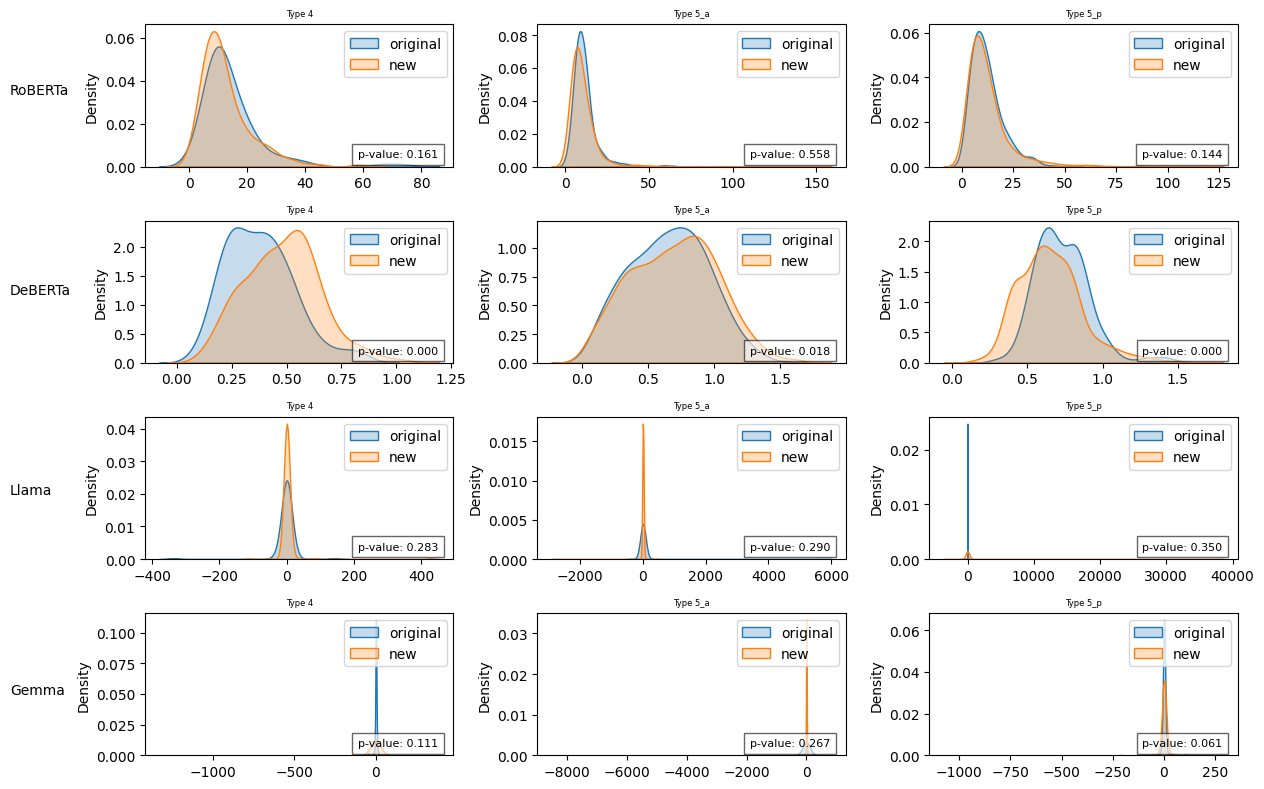

In [9]:
# ALL PLOTS
metric = 'ig'
fig, axs = plt.subplots(4, 3, figsize=(12, 8))

# RoBERTa
kdeplot(axs[0, 0], "Type 4", roberta_orig_data['type4'], roberta_new_data['type4'],metric)
kdeplot(axs[0, 1], "Type 5_a", roberta_orig_data['type5a'], roberta_new_data['type5a'],metric)
kdeplot(axs[0, 2], "Type 5_p", roberta_orig_data['type5p'], roberta_new_data['type5p'],metric)

# DeBERTa
kdeplot(axs[1, 0], "Type 4", deberta_orig_data['type4'], deberta_new_data['type4'],metric)
kdeplot(axs[1, 1], "Type 5_a", deberta_orig_data['type5a'], deberta_new_data['type5a'],metric)
kdeplot(axs[1, 2], "Type 5_p", deberta_orig_data['type5p'], deberta_new_data['type5p'],metric)

# Llama
kdeplot(axs[2, 0], "Type 4", llama_orig_data['type4'], llama_new_data['type4'],metric)
kdeplot(axs[2, 1], "Type 5_a", llama_orig_data['type5a'], llama_new_data['type5a'],metric)
kdeplot(axs[2, 2], "Type 5_p", llama_orig_data['type5p'], llama_new_data['type5p'],metric)

# Gemma
kdeplot(axs[3, 0], "Type 4", gemma_orig_data['type4'], gemma_new_data['type4'],metric)
kdeplot(axs[3, 1], "Type 5_a", gemma_orig_data['type5a'], gemma_new_data['type5a'],metric)
kdeplot(axs[3, 2], "Type 5_p", gemma_orig_data['type5p'], gemma_new_data['type5p'],metric)

row_labels = ['RoBERTa', 'DeBERTa', 'Llama', 'Gemma']
for i, label in enumerate(row_labels):
    fig.text(-0.05, 0.88 - i * 0.25, label, va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.savefig('Part4A_TriggerIG.pdf',bbox_inches='tight')
plt.show()

## Part 4B

In [ ]:
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4B_New/RoBERTa/part4b_{sentence_type}_roberta_results.csv',index_col=0)
df

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

14.260203754437821 13.09625127494244
type4: t = 0.881, p = 0.380
12.23985108467159 12.603362813822338
type5p: t = -0.571, p = 0.568


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


10.95756515720416 11.519713807368678
type5a: t = -1.565, p = 0.118


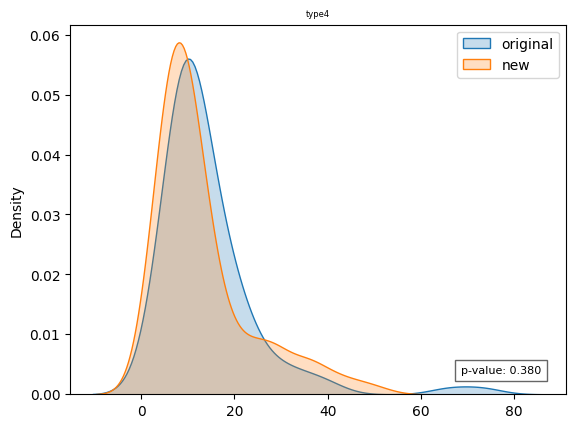

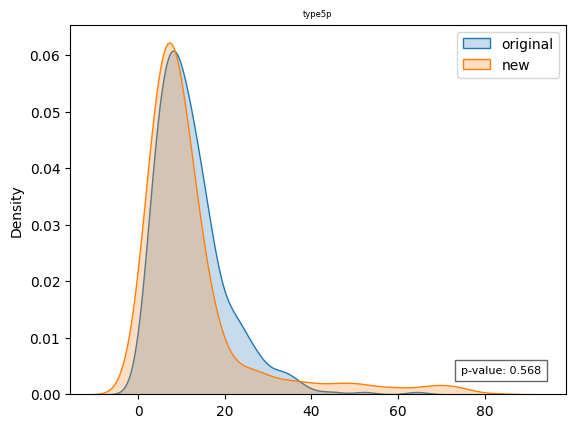

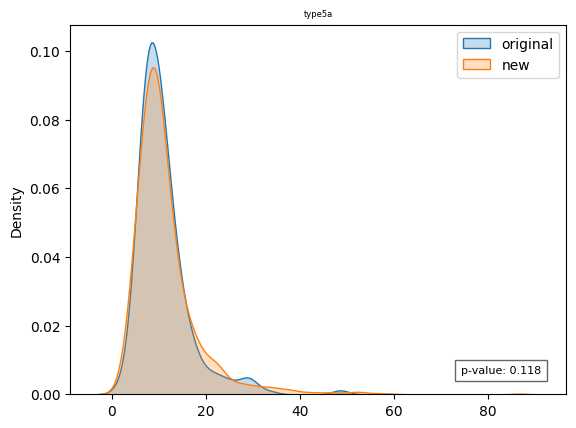

In [10]:
# RoBERTa Related vs New all
for sentence_type in ['type4','type5p','type5a']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4B_New/RoBERTa/part4b_{sentence_type}_roberta_results_new.csv',index_col=0)
    df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
    orig_data = df[df['type'] == 'related']['Trigger IG / Avg. IG']
    new_data = df[df['type'] != 'related']['Trigger IG / Avg. IG']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    fig, ax = plt.subplots()
    kdeplot(ax,sentence_type,orig_data,new_data,'ig') 
    print(orig_data.mean(),new_data.mean())
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")

In [18]:
# DeBERTa
for sentence_type in ['type4','type5p','type5a']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4B_New/DeBERTa/part4b_{sentence_type}_deberta_results_new.csv',index_col=0)
    df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
    orig_data = df[df['type'] == 'related']['Trigger IG / Avg. IG']
    new_data = df[df['type'] != 'related']['Trigger IG / Avg. IG']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(orig_data.mean(),new_data.mean())
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")

0.38129875673484864 0.36586873738642384
type4: t = 0.875, p = 0.383
0.7330338750917771 0.5507240863607885
type5p: t = 15.251, p = 0.000
0.8226373953451989 0.848668718627178
type5a: t = -2.178, p = 0.030


In [ ]:
# Llama
for sentence_type in ['type4','type5p','type5a']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4B_New/Llama/part4b_{sentence_type}_llama_results_new.csv',index_col=0)
    df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
    orig_data = df[df['type'] == 'related']['Trigger IG / Avg. IG']
    new_data = df[df['type'] != 'related']['Trigger IG / Avg. IG']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    fig, ax = plt.subplots()
    kdeplot(ax,sentence_type,orig_data,new_data,'ig') 
    print(orig_data.mean(),new_data.mean())
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")

In [ ]:
for sentence_type in ['type4','type5p','type5a']:
    for relatedness in ['somewhat_related','unrelated']:
        df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4B/Llama/part4b_{sentence_type}_llama_results.csv',index_col=0)
        df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
        orig_data = df[df['type'] == 'related']['Trigger IG / Avg. IG']
        new_data = df[df['type'] == relatedness]['Trigger IG / Avg. IG']
        statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
        print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")

In [ ]:
# Gemma
for sentence_type in ['type4','type5p','type5a']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part4B_New/Gemma/part4b_{sentence_type}_gemma_results.csv',index_col=0)
    df['Trigger IG / Avg. IG'] = df['trigger_gradient'] / df['average_gradient']
    orig_data = df[df['type'] == 'related']['Trigger IG / Avg. IG']
    new_data = df[df['type'] != 'related']['Trigger IG / Avg. IG']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    fig, ax = plt.subplots()
    kdeplot(ax,sentence_type,orig_data,new_data,'ig') 
    print(orig_data.mean(),new_data.mean()) 
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")

## Part 5 Key Phrase 1 -> 2

In [ ]:
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/RoBERTa/roberta_part5_type4.csv',index_col=0)
df['avg_key_phrase_attention'].isna().sum()

In [ ]:
df[df['avg_key_phrase_attention'].isna()]

In [ ]:
df['avg_attention'].isna().sum()

In [ ]:
sentence_type = 'type4'
for relatedness in ['somewhat_related','unrelated']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/RoBERTa/roberta_part5_type4.csv',index_col=0)
    df['Key Phrase Attention / Average Attention'] = df['avg_key_phrase_attention'] / df['avg_attention']
    df = df.dropna(subset=['Key Phrase Attention / Average Attention'])
    orig_data = df[df['type'] == 'related']['Key Phrase Attention / Average Attention']
    new_data = df[df['type'] == relatedness]['Key Phrase Attention / Average Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    kdeplot(sentence_type,orig_data,new_data,relatedness) 
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")

In [ ]:
for sentence_type in ['type5a','type5p']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/RoBERTa/roberta_part5_{sentence_type}.csv',index_col=0)
    df['Key Phrase Attention / Average Attention'] = df['avg_key_phrase_attention'] / df['avg_attention']
    df = df.dropna(subset=['Key Phrase Attention / Average Attention'])
    orig_data = df[df['type'] == 'related']['Key Phrase Attention / Average Attention']
    new_data = df[df['type'] == relatedness]['Key Phrase Attention / Average Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    kdeplot(sentence_type,orig_data,new_data,relatedness) 
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")

In [ ]:
sentence_type = 'type4'
for relatedness in ['somewhat_related','unrelated']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/DeBERTa/deberta_part5_type4.csv',index_col=0)
    df['Key Phrase Attention / Average Attention'] = df['avg_key_phrase_attention'] / df['avg_attention']
    df = df.dropna(subset=['Key Phrase Attention / Average Attention'])
    orig_data = df[df['type'] == 'related']['Key Phrase Attention / Average Attention']
    new_data = df[df['type'] == relatedness]['Key Phrase Attention / Average Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    kdeplot(sentence_type,orig_data,new_data,relatedness) 
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")

In [ ]:
for sentence_type in ['type5a','type5p']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/DeBERTa/deberta_part5_{sentence_type}.csv',index_col=0)
    df['Key Phrase Attention / Average Attention'] = df['avg_key_phrase_attention'] / df['avg_attention']
    df = df.dropna(subset=['Key Phrase Attention / Average Attention'])
    orig_data = df[df['type'] == 'related']['Key Phrase Attention / Average Attention']
    new_data = df[df['type'] == relatedness]['Key Phrase Attention / Average Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    kdeplot(sentence_type,orig_data,new_data,relatedness) 
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")

In [ ]:
sentence_type = 'type4'
for relatedness in ['somewhat_related','unrelated']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/Llama/llama_part5_type4.csv',index_col=0)
    df['Key Phrase Attention / Average Attention'] = df['avg_key_phrase_attention'] / df['avg_attention']
    df = df.dropna(subset=['Key Phrase Attention / Average Attention'])
    orig_data = df[df['type'] == 'related']['Key Phrase Attention / Average Attention']
    new_data = df[df['type'] == relatedness]['Key Phrase Attention / Average Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    kdeplot(sentence_type,orig_data,new_data,relatedness) 
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")

In [ ]:
for sentence_type in ['type5a','type5p']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/Llama/llama_part5_{sentence_type}.csv',index_col=0)
    df['Key Phrase Attention / Average Attention'] = df['avg_key_phrase_attention'] / df['avg_attention']
    df = df.dropna(subset=['Key Phrase Attention / Average Attention'])
    orig_data = df[df['type'] == 'related']['Key Phrase Attention / Average Attention']
    new_data = df[df['type'] == relatedness]['Key Phrase Attention / Average Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    kdeplot(sentence_type,orig_data,new_data,relatedness) 
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")

In [ ]:
sentence_type = 'type4'
for relatedness in ['somewhat_related','unrelated']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/Gemma/gemma_part5_type4.csv',index_col=0)
    df['Key Phrase Attention / Average Attention'] = df['avg_key_phrase_attention'] / df['avg_attention']
    df = df.dropna(subset=['Key Phrase Attention / Average Attention'])
    orig_data = df[df['type'] == 'related']['Key Phrase Attention / Average Attention']
    new_data = df[df['type'] == relatedness]['Key Phrase Attention / Average Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    kdeplot(sentence_type,orig_data,new_data,relatedness) 
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")

In [ ]:
for sentence_type in ['type5a','type5p']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/Gemma/gemma_part5_{sentence_type}.csv',index_col=0)
    df['Key Phrase Attention / Average Attention'] = df['avg_key_phrase_attention'] / df['avg_attention']
    df = df.dropna(subset=['Key Phrase Attention / Average Attention'])
    orig_data = df[df['type'] == 'related']['Key Phrase Attention / Average Attention']
    new_data = df[df['type'] == relatedness]['Key Phrase Attention / Average Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    kdeplot(sentence_type,orig_data,new_data,relatedness) 
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")

## 

In [ ]:
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/RoBERTa/roberta_part5_type4.csv',index_col=0)
df

In [23]:
## All Plots 
roberta_orig_data = {}
roberta_new_data = {}
row_index = 0
sentence_type = 'type4'
for i, relatedness in enumerate(['somewhat_related','unrelated']):
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/RoBERTa/roberta_part5_type4.csv',index_col=0)
    df['Key Phrase Attention / Average Attention'] = df['avg_key_phrase_attention'] / df['avg_attention']
    df = df.dropna(subset=['Key Phrase Attention / Average Attention'])
    orig_data = df[df['type'] == 'related']['Key Phrase Attention / Average Attention']
    new_data = df[df['type'] == relatedness]['Key Phrase Attention / Average Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")
    roberta_orig_data[f'type4_{relatedness}'] = orig_data
    roberta_new_data[f'type4_{relatedness}'] = new_data

type4: t = -0.774, p = 0.440
type4: t = 0.181, p = 0.857


In [24]:
for i, sentence_type in enumerate(['type5a','type5p']):
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/RoBERTa/roberta_part5_{sentence_type}.csv',index_col=0)
    df['Key Phrase Attention / Average Attention'] = df['avg_key_phrase_attention'] / df['avg_attention']
    df = df.dropna(subset=['Key Phrase Attention / Average Attention'])
    orig_data = df[df['type'] == 'related']['Key Phrase Attention / Average Attention']
    new_data = df[df['type'] == relatedness]['Key Phrase Attention / Average Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")
    roberta_orig_data[sentence_type] = orig_data
    roberta_new_data[sentence_type] = new_data

type5a: t = -8.777, p = 0.000
type5p: t = -2.026, p = 0.043


In [25]:
deberta_orig_data = {}
deberta_new_data = {}
row_index = 0
sentence_type = 'type4'
for i, relatedness in enumerate(['somewhat_related','unrelated']):
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/DeBERTa/deberta_part5_type4.csv',index_col=0)
    df['Key Phrase Attention / Average Attention'] = df['avg_key_phrase_attention'] / df['avg_attention']
    df = df.dropna(subset=['Key Phrase Attention / Average Attention'])
    orig_data = df[df['type'] == 'related']['Key Phrase Attention / Average Attention']
    new_data = df[df['type'] == relatedness]['Key Phrase Attention / Average Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")
    deberta_orig_data[f'type4_{relatedness}'] = orig_data
    deberta_new_data[f'type4_{relatedness}'] = new_data

type4: t = -0.181, p = 0.856
type4: t = 0.564, p = 0.573


In [26]:
for i, sentence_type in enumerate(['type5a','type5p']):
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/DeBERTa/deberta_part5_{sentence_type}.csv',index_col=0)
    df['Key Phrase Attention / Average Attention'] = df['avg_key_phrase_attention'] / df['avg_attention']
    df = df.dropna(subset=['Key Phrase Attention / Average Attention'])
    orig_data = df[df['type'] == 'related']['Key Phrase Attention / Average Attention']
    new_data = df[df['type'] == relatedness]['Key Phrase Attention / Average Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")
    deberta_orig_data[sentence_type] = orig_data
    deberta_new_data[sentence_type] = new_data

type5a: t = -15.741, p = 0.000
type5p: t = 1.108, p = 0.268


In [27]:
llama_orig_data = {}
llama_new_data = {}
row_index = 0
sentence_type = 'type4'
for i, relatedness in enumerate(['somewhat_related','unrelated']):
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/Llama/llama_part5_type4.csv',index_col=0)
    df['Key Phrase Attention / Average Attention'] = df['avg_key_phrase_attention'] / df['avg_attention']
    df = df.dropna(subset=['Key Phrase Attention / Average Attention'])
    orig_data = df[df['type'] == 'related']['Key Phrase Attention / Average Attention']
    new_data = df[df['type'] == relatedness]['Key Phrase Attention / Average Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")
    llama_orig_data[f'type4_{relatedness}'] = orig_data
    llama_new_data[f'type4_{relatedness}'] = new_data

type4: t = -0.565, p = 0.573
type4: t = 0.582, p = 0.561


In [28]:
for i, sentence_type in enumerate(['type5a','type5p']):
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/Llama/llama_part5_{sentence_type}.csv',index_col=0)
    df['Key Phrase Attention / Average Attention'] = df['avg_key_phrase_attention'] / df['avg_attention']
    df = df.dropna(subset=['Key Phrase Attention / Average Attention'])
    orig_data = df[df['type'] == 'related']['Key Phrase Attention / Average Attention']
    new_data = df[df['type'] == relatedness]['Key Phrase Attention / Average Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")
    llama_orig_data[sentence_type] = orig_data
    llama_new_data[sentence_type] = new_data

type5a: t = -10.822, p = 0.000
type5p: t = -1.373, p = 0.170


In [31]:
gemma_orig_data = {}
gemma_new_data = {}
row_index = 0
sentence_type = 'type4'
for i, relatedness in enumerate(['somewhat_related','unrelated']):
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/Gemma/gemma_part5_type4.csv',index_col=0)
    df['Key Phrase Attention / Average Attention'] = df['avg_key_phrase_attention'] / df['avg_attention']
    df = df.dropna(subset=['Key Phrase Attention / Average Attention'])
    orig_data = df[df['type'] == 'related']['Key Phrase Attention / Average Attention']
    new_data = df[df['type'] == relatedness]['Key Phrase Attention / Average Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")
    gemma_orig_data[f'type4_{relatedness}'] = orig_data
    gemma_new_data[f'type4_{relatedness}'] = new_data

type4: t = -0.775, p = 0.439
type4: t = 0.768, p = 0.444


In [33]:
for i, sentence_type in enumerate(['type5a','type5p']):
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/Gemma/gemma_part5_{sentence_type}.csv',index_col=0)
    df['Key Phrase Attention / Average Attention'] = df['avg_key_phrase_attention'] / df['avg_attention']
    df = df.dropna(subset=['Key Phrase Attention / Average Attention'])
    orig_data = df[df['type'] == 'related']['Key Phrase Attention / Average Attention']
    new_data = df[df['type'] == relatedness]['Key Phrase Attention / Average Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")
    gemma_orig_data[sentence_type] = orig_data
    gemma_new_data[sentence_type] = new_data

type5a: t = -15.406, p = 0.000
type5p: t = -0.804, p = 0.422


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

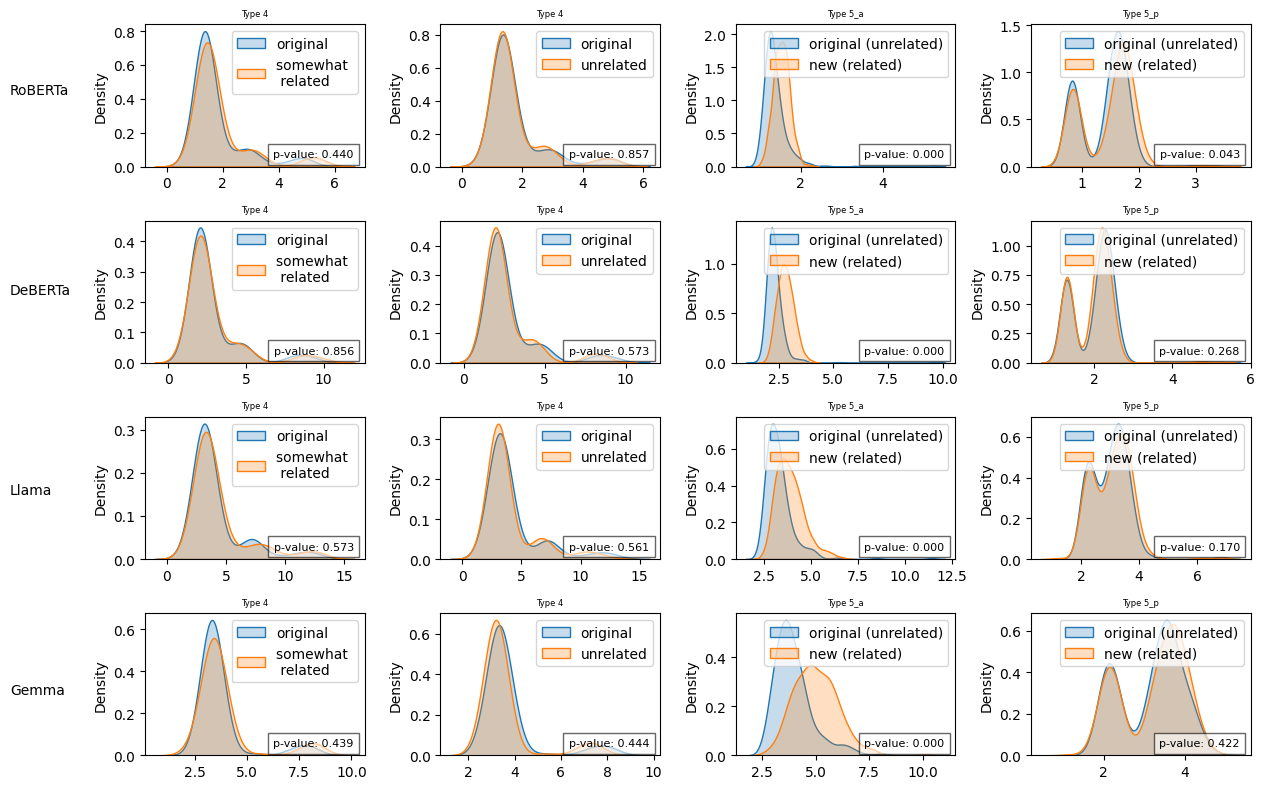

In [34]:
# ALL PLOTS
fig, axs = plt.subplots(4, 4, figsize=(12, 8))


# RoBERTa
metric = 'kp_attention'
kdeplot(axs[0, 0], "Type 4", roberta_orig_data['type4_somewhat_related'], roberta_new_data['type4_somewhat_related'],metric,newdata_label='somewhat \n related')
kdeplot(axs[0, 1], "Type 4", roberta_orig_data['type4_unrelated'], roberta_new_data['type4_unrelated'],metric, newdata_label='unrelated')
kdeplot(axs[0, 2], "Type 5_a", roberta_orig_data['type5a'], roberta_new_data['type5a'],metric,origdata_label='original (unrelated)', newdata_label='new (related)')
kdeplot(axs[0, 3], "Type 5_p", roberta_orig_data['type5p'], roberta_new_data['type5p'],metric,origdata_label='original (unrelated)', newdata_label='new (related)')

# DeBERTa
kdeplot(axs[1, 0], "Type 4", deberta_orig_data['type4_somewhat_related'], deberta_new_data['type4_somewhat_related'],metric,newdata_label='somewhat \n related')
kdeplot(axs[1, 1], "Type 4", deberta_orig_data['type4_unrelated'], deberta_new_data['type4_unrelated'],metric,newdata_label='unrelated')
kdeplot(axs[1, 2], "Type 5_a", deberta_orig_data['type5a'], deberta_new_data['type5a'],metric,origdata_label='original (unrelated)', newdata_label='new (related)')
kdeplot(axs[1, 3], "Type 5_p", deberta_orig_data['type5p'], deberta_new_data['type5p'],metric,origdata_label='original (unrelated)', newdata_label='new (related)')

# Llama
kdeplot(axs[2, 0], "Type 4", llama_orig_data['type4_somewhat_related'], llama_new_data['type4_somewhat_related'],metric,newdata_label='somewhat \n related')
kdeplot(axs[2, 1], "Type 4", llama_orig_data['type4_unrelated'], llama_new_data['type4_unrelated'],metric,newdata_label='unrelated')
kdeplot(axs[2, 2], "Type 5_a", llama_orig_data['type5a'], llama_new_data['type5a'],metric,origdata_label='original (unrelated)', newdata_label='new (related)')
kdeplot(axs[2, 3], "Type 5_p", llama_orig_data['type5p'], llama_new_data['type5p'],metric,origdata_label='original (unrelated)', newdata_label='new (related)')

# Gemma
kdeplot(axs[3, 0], "Type 4", gemma_orig_data['type4_somewhat_related'], gemma_new_data['type4_somewhat_related'],metric,newdata_label='somewhat \n related')
kdeplot(axs[3, 1], "Type 4", gemma_orig_data['type4_unrelated'], gemma_new_data['type4_unrelated'],metric, newdata_label='unrelated')
kdeplot(axs[3, 2], "Type 5_a", gemma_orig_data['type5a'], gemma_new_data['type5a'],metric,origdata_label='original (unrelated)', newdata_label='new (related)')
kdeplot(axs[3, 3], "Type 5_p", gemma_orig_data['type5p'], gemma_new_data['type5p'],metric,origdata_label='original (unrelated)', newdata_label='new (related)')

row_labels = ['RoBERTa', 'DeBERTa', 'Llama', 'Gemma']
for i, label in enumerate(row_labels):
    fig.text(-0.05, 0.88 - i * 0.25, label, va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.savefig('Part5_Interphrase_Attention.pdf',bbox_inches='tight')
plt.show()

## Part 5 Key Phrase 2 -> CLS

In [35]:
df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/RoBERTa/roberta_part5_type4_att_new.csv',index_col=0)
df

,premise,hypothesis,gold_label,trigger,key_phrase1,key_phrase2,type,attention,tokens,cls_attention,avg_cls_attention,key_phrase1_att,key_phrase2_att
0,"If Liam is an aerospace engineer, he'll use hi...",Liam has a wind tunnel.,E,possessive,his wind tunnel,improve aircraft performance,related,[[0.17215282 0.00384264 0.00542398 0.00518274 ...,"['<s>', 'If', 'ĠLiam', 'Ġis', 'Ġan', 'Ġaerospa...",<s> 0.213910\nIf 0.1725...,0.176148,0.172267,0.177741
1,"If Bill is a content strategist, he'll use his...",Bill has a content management application.,E,possessive,his content management application,plan and organize digital content,related,[[0.16770327 0.00354973 0.0051103 ... 0.01407...,"['<s>', 'If', 'ĠBill', 'Ġis', 'Ġa', 'Ġcontent'...",<s> 0.211913\nIf 0.1697...,0.170565,0.157983,0.172616
2,"If Steve is a conservation officer, he'll use ...",Steve has a wildlife trap.,E,possessive,his wildlife trap,monitor and protect animal populations,related,[[0.17198363 0.00345839 0.00594851 0.00465825 ...,"['<s>', 'If', 'ĠSteve', 'Ġis', 'Ġa', 'Ġconserv...",<s> 0.214726\nIf 0.16...,0.177441,0.176105,0.177265
3,"If Matt is a scuba diver, he'll wear his wetsu...",Matt has a wetsuit.,E,possessive,his wetsuit,maintain body temperature underwater,related,[[0.16816372 0.00367785 0.0056914 ... 0. ...,"['<s>', 'If', 'ĠMatt', 'Ġis', 'Ġa', 'Ġsc', 'ub...",<s> 0.213088\nIf 0.1721...,0.174726,0.331540,0.178796
4,"If Noah is a pastry chef, he'll use his pastry...",Noah has a pastry bag.,E,possessive,his pastry bag,decorate cakes and pastries,related,[[0.17020833 0.00360169 0.00653982 ... 0.01324...,"['<s>', 'If', 'ĠNoah', 'Ġis', 'Ġa', 'Ġpastry',...",<s> 0.213853\nIf 0.169460\nNo...,0.175823,0.172018,0.209481
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,"If Christina is a makeup artist, she'll grab h...",Christina has a makeup sponge.,E,possessive,her makeup sponge,rides a scooter,unrelated,[[0.17304003 0.00339354 0.00598052 0.0049281 ...,"['<s>', 'If', 'ĠChristina', 'Ġis', 'Ġa', 'Ġmak...",<s> 0.214212\nIf 0.168300\n...,0.176559,0.176409,0.227104
293,"If Rahim is a clergyman, he'll bring his holy ...",Rahim has a holy book.,E,possessive,his holy book,gardens roses,unrelated,[[0.17369306 0.00370268 0.00824293 0. ...,"['<s>', 'If', 'ĠRah', 'im', 'Ġis', 'Ġa', 'Ġcle...",<s> 0.214490\nIf 0.167257\n...,0.175260,0.168897,0.188196
294,"If James is a police officer, he'll pick his g...",James has a gun.,E,possessive,his gun,drinks tea,unrelated,[[0.17721617 0.00362376 0.00581977 0.00534853 ...,"['<s>', 'If', 'ĠJames', 'Ġis', 'Ġa', 'Ġpolice'...",<s> 0.217181\nIf 0.169872\nJame...,0.180721,0.172149,0.187951
295,"If Maya is a piano teacher, she'll pack her me...",Maya has a metronome.,E,possessive,her metronome,knits hats,unrelated,[[0.1704165 0.00369017 0.00661746 0.00529915 ...,"['<s>', 'If', 'ĠMaya', 'Ġis', 'Ġa', 'Ġpiano', ...",<s> 0.211915\nIf 0.166234\n...,0.173900,0.334359,0.176047


In [36]:
roberta_orig_data = {}
roberta_new_data = {}

In [37]:
row_index = 0
sentence_type = 'type4'
for i, relatedness in enumerate(['somewhat_related','unrelated']):
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/RoBERTa/roberta_part5_type4_att_new.csv',index_col=0)
    df['key_phrase2_att / Average CLS Attention'] = df['key_phrase2_att'] / df['avg_cls_attention']
    df = df.dropna(subset=['key_phrase2_att / Average CLS Attention'])
    orig_data = df[df['type'] == 'related']['key_phrase2_att / Average CLS Attention']
    new_data = df[df['type'] == relatedness]['key_phrase2_att / Average CLS Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")
    roberta_orig_data[f'type4_{relatedness}'] = orig_data
    roberta_new_data[f'type4_{relatedness}'] = new_data

type4: t = 5.095, p = 0.000
type4: t = -1.111, p = 0.268


In [38]:
for i, sentence_type in enumerate(['type5a','type5p']):
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/RoBERTa/roberta_part5_{sentence_type}_att_new.csv',index_col=0)
    df['key_phrase2_att / Average CLS Attention'] = df['key_phrase2_att'] / df['avg_cls_attention']
    df = df.dropna(subset=['key_phrase2_att / Average CLS Attention'])
    orig_data = df[df['type'] == 'related']['key_phrase2_att / Average CLS Attention']
    new_data = df[df['type'] == relatedness]['key_phrase2_att / Average CLS Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")
    roberta_orig_data[sentence_type] = orig_data
    roberta_new_data[sentence_type] = new_data

type5a: t = 1.751, p = 0.080
type5p: t = 2.636, p = 0.009


In [39]:
deberta_orig_data = {}
deberta_new_data = {}

In [40]:
sentence_type = 'type4'
for relatedness in ['somewhat_related','unrelated']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/DeBERTa/deberta_part5_type4_att_new.csv',index_col=0)
    df['key_phrase2_att / Average CLS Attention'] = df['key_phrase2_att'] / df['avg_cls_attention']
    df = df.dropna(subset=['key_phrase2_att / Average CLS Attention'])
    orig_data = df[df['type'] == 'related']['key_phrase2_att / Average CLS Attention']
    new_data = df[df['type'] == relatedness]['key_phrase2_att / Average CLS Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")
    deberta_orig_data[f'type4_{relatedness}'] = orig_data
    deberta_new_data[f'type4_{relatedness}'] = new_data

type4: t = 2.249, p = 0.026
type4: t = 0.420, p = 0.675


In [41]:
for sentence_type in ['type5a','type5p']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/DeBERTa/deberta_part5_{sentence_type}_att_new.csv',index_col=0)
    df['key_phrase2_att / Average CLS Attention'] = df['key_phrase2_att'] / df['avg_cls_attention']
    df = df.dropna(subset=['key_phrase2_att / Average CLS Attention'])
    orig_data = df[df['type'] == 'related']['key_phrase2_att / Average CLS Attention']
    new_data = df[df['type'] == relatedness]['key_phrase2_att / Average CLS Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")
    deberta_orig_data[sentence_type] = orig_data
    deberta_new_data[sentence_type] = new_data

type5a: t = -26.250, p = 0.000
type5p: t = 6.033, p = 0.000


In [42]:
llama_orig_data = {}
llama_new_data = {}

In [43]:
sentence_type = 'type4'
for relatedness in ['somewhat_related','unrelated']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/Llama/llama_part5_type4_att_new.csv',index_col=0)
    df['key_phrase2_att / Average CLS Attention'] = df['key_phrase2_att'] / df['avg_cls_attention']
    df = df.dropna(subset=['key_phrase2_att / Average CLS Attention'])
    orig_data = df[df['type'] == 'related']['key_phrase2_att / Average CLS Attention']
    new_data = df[df['type'] == relatedness]['key_phrase2_att / Average CLS Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")
    llama_orig_data[f'type4_{relatedness}'] = orig_data
    llama_new_data[f'type4_{relatedness}'] = new_data

type4: t = 1.612, p = 0.110
type4: t = -1.391, p = 0.166


In [44]:
for sentence_type in ['type5a','type5p']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/Llama/llama_part5_{sentence_type}_att_new.csv',index_col=0)
    df['key_phrase2_att / Average CLS Attention'] = df['key_phrase2_att'] / df['avg_cls_attention']
    df = df.dropna(subset=['key_phrase2_att / Average CLS Attention'])
    orig_data = df[df['type'] == 'related']['key_phrase2_att / Average CLS Attention']
    new_data = df[df['type'] == relatedness]['key_phrase2_att / Average CLS Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")
    llama_orig_data[sentence_type] = orig_data
    llama_new_data[sentence_type] = new_data

type5a: t = -39.008, p = 0.000
type5p: t = 0.876, p = 0.381


In [45]:
gemma_orig_data = {}
gemma_new_data = {}

In [46]:
sentence_type = 'type4'
for relatedness in ['somewhat_related','unrelated']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/Gemma/gemma_part5_type4_att_new.csv',index_col=0)
    df['key_phrase2_att / Average CLS Attention'] = df['key_phrase2_att'] / df['avg_cls_attention']
    df = df.dropna(subset=['key_phrase2_att / Average CLS Attention'])
    orig_data = df[df['type'] == 'related']['key_phrase2_att / Average CLS Attention']
    new_data = df[df['type'] == relatedness]['key_phrase2_att / Average CLS Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")
    gemma_orig_data[f'type4_{relatedness}'] = orig_data
    gemma_new_data[f'type4_{relatedness}'] = new_data

type4: t = -3.910, p = 0.000
type4: t = -2.570, p = 0.011


In [47]:
for sentence_type in ['type5a','type5p']:
    df = pd.read_csv(f'/kaggle/input/confer-extension-results/Part5/Gemma/gemma_part5_{sentence_type}_att_new.csv',index_col=0)
    df['key_phrase2_att / Average CLS Attention'] = df['key_phrase2_att'] / df['avg_cls_attention']
    df = df.dropna(subset=['key_phrase2_att / Average CLS Attention'])
    orig_data = df[df['type'] == 'related']['key_phrase2_att / Average CLS Attention']
    new_data = df[df['type'] == relatedness]['key_phrase2_att / Average CLS Attention']
    statistic, p_value = ttest_ind(orig_data, new_data, equal_var=False)
    print(f"{sentence_type}: t = {statistic:.3f}, p = {p_value:.3f}")
    gemma_orig_data[sentence_type] = orig_data
    gemma_new_data[sentence_type] = new_data

type5a: t = -44.806, p = 0.000
type5p: t = 4.931, p = 0.000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

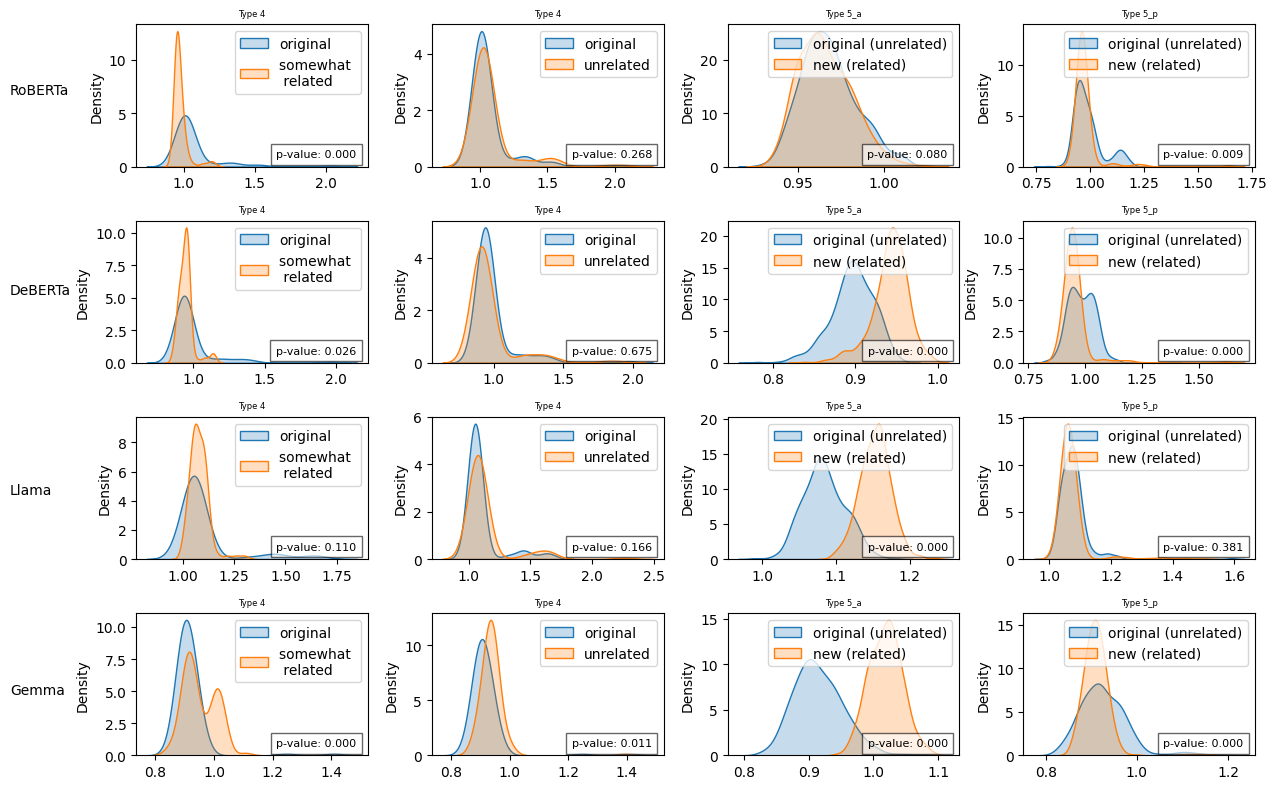

In [48]:
# ALL PLOTS
fig, axs = plt.subplots(4, 4, figsize=(12, 8))

# RoBERTa
metric = 'kp_attention'
kdeplot(axs[0, 0], "Type 4", roberta_orig_data['type4_somewhat_related'], roberta_new_data['type4_somewhat_related'],metric,newdata_label='somewhat \n related')
kdeplot(axs[0, 1], "Type 4", roberta_orig_data['type4_unrelated'], roberta_new_data['type4_unrelated'],metric, newdata_label='unrelated')
kdeplot(axs[0, 2], "Type 5_a", roberta_orig_data['type5a'], roberta_new_data['type5a'],metric,origdata_label='original (unrelated)', newdata_label='new (related)')
kdeplot(axs[0, 3], "Type 5_p", roberta_orig_data['type5p'], roberta_new_data['type5p'],metric,origdata_label='original (unrelated)', newdata_label='new (related)')

# DeBERTa
kdeplot(axs[1, 0], "Type 4", deberta_orig_data['type4_somewhat_related'], deberta_new_data['type4_somewhat_related'],metric,newdata_label='somewhat \n related')
kdeplot(axs[1, 1], "Type 4", deberta_orig_data['type4_unrelated'], deberta_new_data['type4_unrelated'],metric,newdata_label='unrelated')
kdeplot(axs[1, 2], "Type 5_a", deberta_orig_data['type5a'], deberta_new_data['type5a'],metric,origdata_label='original (unrelated)', newdata_label='new (related)')
kdeplot(axs[1, 3], "Type 5_p", deberta_orig_data['type5p'], deberta_new_data['type5p'],metric,origdata_label='original (unrelated)', newdata_label='new (related)')

# Llama
kdeplot(axs[2, 0], "Type 4", llama_orig_data['type4_somewhat_related'], llama_new_data['type4_somewhat_related'],metric,newdata_label='somewhat \n related')
kdeplot(axs[2, 1], "Type 4", llama_orig_data['type4_unrelated'], llama_new_data['type4_unrelated'],metric,newdata_label='unrelated')
kdeplot(axs[2, 2], "Type 5_a", llama_orig_data['type5a'], llama_new_data['type5a'],metric,origdata_label='original (unrelated)', newdata_label='new (related)')
kdeplot(axs[2, 3], "Type 5_p", llama_orig_data['type5p'], llama_new_data['type5p'],metric,origdata_label='original (unrelated)', newdata_label='new (related)')

# Gemma
kdeplot(axs[3, 0], "Type 4", gemma_orig_data['type4_somewhat_related'], gemma_new_data['type4_somewhat_related'],metric,newdata_label='somewhat \n related')
kdeplot(axs[3, 1], "Type 4", gemma_orig_data['type4_unrelated'], gemma_new_data['type4_unrelated'],metric, newdata_label='unrelated')
kdeplot(axs[3, 2], "Type 5_a", gemma_orig_data['type5a'], gemma_new_data['type5a'],metric,origdata_label='original (unrelated)', newdata_label='new (related)')
kdeplot(axs[3, 3], "Type 5_p", gemma_orig_data['type5p'], gemma_new_data['type5p'],metric,origdata_label='original (unrelated)', newdata_label='new (related)')

row_labels = ['RoBERTa', 'DeBERTa', 'Llama', 'Gemma']
for i, label in enumerate(row_labels):
    fig.text(-0.05, 0.88 - i * 0.25, label, va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.savefig('Part5_CLS_Attention.pdf',bbox_inches='tight')
plt.show()